# Optiver Puzzle

An ant leaves its anthill in order to forage for food. It moves with the speed of 10cm per second, but it doesn't know where to go, therefore every second it moves randomly 10cm directly north, south, east or west with equal probability.

1. If the food is located on east-west lines 20cm to the north and 20cm to the south, as well as on north-south lines 20cm to the east and 20cm to the west from the anthill, how long will it take the ant to reach it on average?
2. What is the average time the ant will reach food if it is located only on a diagonal line passing through (10cm, 0cm) and (0cm, 10cm) points?
3. Can you write a program that comes up with an estimate of average time to find food for any closed boundary around the anthill? What would be the answer if food is located outside an defined by ( (x – 2.5cm) / 30cm )2 + ( (y – 2.5cm) / 40cm )2 < 1 in coordinate system where the anthill is located at (x = 0cm, y = 0cm)? Provide us with a solution rounded to the nearest integer.


## Answer

All three scenarios can be studied using Markov Chains to keep track of $P(X=x,Y=y|T=t)$ (i.e., the probability of the ant being at position _(x,y)_ at every time step _t_). To implement this, a list of `Point`s is created, where each `Point` represents a possible location of the ant. The function `simulation` propagates the probabilities to each neighbouring `Point` and outputs the expected number of seconds until the ant reaches the food. The code is given in the utils.py file.

**Note**: this implementation assumes that the boundary defines a convex set of points (i.e. it is never the case that the ant crosses the food boundary more than one time in a single time step).

The remainder of this notebook illustrates the configuration of each scenario and the results of each simulation.

In [1]:
from utils import *
%matplotlib inline

### Scenario 1
#### Visualisation
The food describes a square centered in the anthill.
The code below describes the food boundary (blue) and the possible points the ant can be at before reaching food (red).

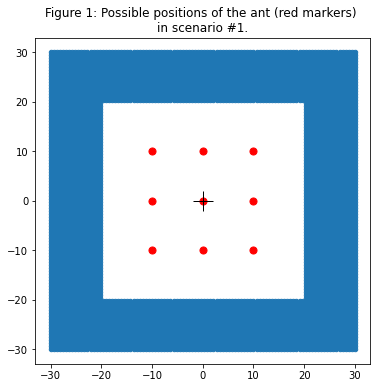

In [2]:
# Enter the boundary function and the range to visualise.
ax_1 = plot_boundaries(termination_1, 30)
points_1 = plot_points(termination_1, title="Figure 1: Possible positions of the ant (red markers) \nin scenario #1.")

#### Simulation

Next, a simulation is run for a number of iterations, storing the **expected** number of seconds that takes an ant to reach the boundary.

It takes the ant 4.50 seconds to reach the food in scenario #1


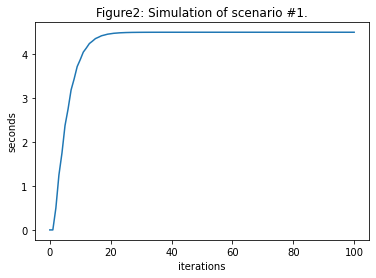

In [3]:
res_1 = simulation(termination_1, 100, 'Figure2: Simulation of scenario #1.')
print("It takes the ant {:.2f} seconds to reach the food in scenario #1".format(res_1[-1]))

### Scenario 2
#### Visualisation
The food describes an open boundary in the form of a straight diagonal line.
Again, the code below describes the food-anthill configuration (not that this is a partial representation since the food boundary is infinite).

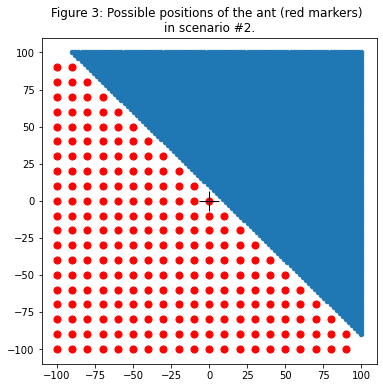

In [4]:
# Enter the boundary function and the range to visualise.
ax_2 = plot_boundaries(termination_2, 100)
points_2 = plot_points(termination_2, title="Figure 3: Possible positions of the ant (red markers) \nin scenario #2.")

#### Simulation

In this case, the simulation does not converge to a number, meaning that in an open boundary, some ants would take an infinite amount of time to reach the food. This is shown below:

The expected number of seconds is non-convergent for open boundaries.


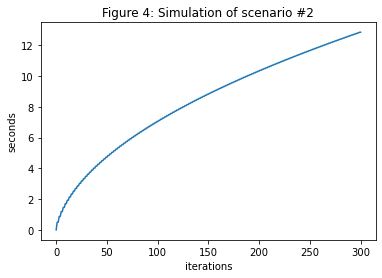

In [5]:
res_2 = simulation(termination_2, 300, 'Figure 4: Simulation of scenario #2')
print("The expected number of seconds is non-convergent for open boundaries.")

### Scenario 3
#### Visualisation
The food boundary describes an ellipse around the anthill.
One more time, the code below describes this configuration.

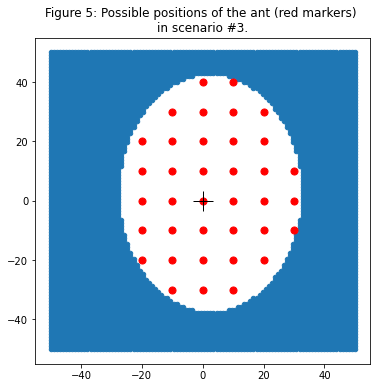

In [6]:
# Enter the boundary function and the range to visualise.
ax_3 = plot_boundaries(termination_3, 50)
points_3 = plot_points(termination_3, title="Figure 5: Possible positions of the ant (red markers) \nin scenario #3.")

#### Simulation

Since this is a closed boundary, the number of seconds converges again. The solution is analogous to that of scenario #1.

It takes the ant 14 seconds to reach the food in scenario #3


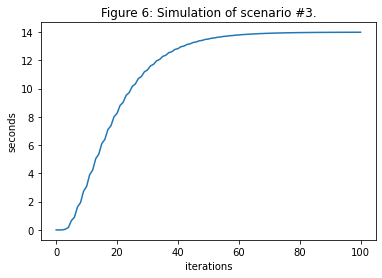

In [7]:
res_3 = simulation(termination_3, 100, 'Figure 6: Simulation of scenario #3.')
print("It takes the ant {:.0f} seconds to reach the food in scenario #3".format(res_3[-1]))